## Missing Value Imputation and Outlier Analysis

### Part 1 -  Missing Value imputation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading the data
import os
os.getcwd()
os.chdir(r"C:\Users\ASUS\Desktop\Python")

fram = pd.read_csv("framingham.csv")

In [4]:
fram.shape

(4240, 16)

In [5]:
fram.head(16)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
#description of the data
fram.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#### 1. The isnul() method

In [7]:
fram.isnull()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
type(fram.isnull())

pandas.core.frame.DataFrame

In [9]:
fram.sum()

male                 1820.00
age                210220.00
education            8185.00
currentSmoker        2095.00
cigsPerDay          37924.00
BPMeds                124.00
prevalentStroke        25.00
prevalentHyp         1317.00
diabetes              109.00
totChol            991771.00
sysBP              561183.50
diaBP              351486.50
BMI                108905.18
heartRate          321651.00
glucose            315724.00
TenYearCHD            644.00
dtype: float64

In [10]:
#Getting the number of missing values
fram.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
type(fram.isnull().sum())

pandas.core.series.Series

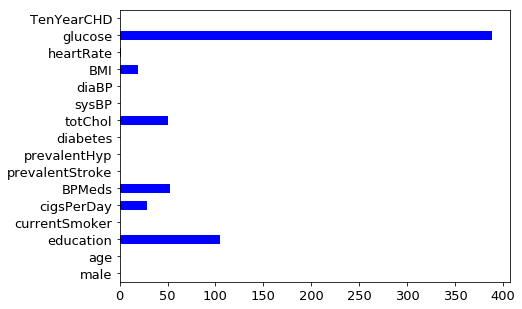

In [12]:
#Plotting the missing value information
miss = fram.isnull().sum()
miss.plot(kind='barh', figsize=(7,5), color="blue", fontsize=13)
plt.show()

In [13]:
miss = fram.isnull().sum()

In [14]:
type(miss)

pandas.core.series.Series

In [15]:
#Getting the percentage of missing values
round(fram.isnull().sum()/len(fram.index)*100,3)

TypeError: cannot convert the series to <type 'float'>

In [ ]:
#Only the variables that contains the missing values
x = round((fram.isnull()).sum()/len(fram.index)*100,3)
x[x>0]

#### 2. Complete Case Analysis

In [ ]:
#Complete case considering all the variables
fram2 = fram.dropna()

In [ ]:
fram2.shape

In [ ]:
fram.shape

In [ ]:
4240 - 3658

In [ ]:
sum(fram.isnull().sum())

In [ ]:
582*16-sum(fram.isnull().sum())

In [ ]:
#fram2.isnull().sum()

In [ ]:
#Complete case considering a subset of variables
fram2 = fram.dropna(subset = ["totChol","BMI","glucose"])

In [ ]:
fram2.shape

In [ ]:
4240-3828

In [ ]:
(fram2.isnull()).sum()

#### 3. Mean or Median Imputation

In [ ]:
#Making a copy of the data
fram3 = fram.copy()

In [ ]:
#Mean of all the variables
fram3.mean()

In [ ]:
#Imputing the missing values in the variable totChol using the mean
#Mean of age
fram3.totChol.mean()

In [ ]:
#Spotting the missing values in the variable age
fram3.totChol[fram3.totChol.isnull()] = fram3.totChol.mean()

In [ ]:
fram3.totChol.isnull().sum()

In [ ]:
#Checking if the missing values got imputed
fram3.totChol.isnull().sum()

In [ ]:
(fram3.isnull()).sum()

In [ ]:
#Re-checking the mean of the variable
fram3.age.mean()

In [ ]:
#Impute the missing values of the variable BMI with median (Do Yourself)




#### 4. Choosing Mean Imputation Vs Median Imputation

In [ ]:
#Check the distribution of the variable - If highly skewed go for median
import matplotlib.pyplot as plt

fram.hist("BMI", grid=False, edgecolor="black")
plt.show()

In [ ]:
print(fram.BMI.mean())
print(fram.BMI.median())

In [ ]:
#Taking the log transformation of the variable
import numpy as np

fram["logBMI"] = np.log(fram.BMI)
fram.head()

In [ ]:
#Histogram of the log transformed variable
fram.hist("logBMI", grid=False, edgecolor="black")
plt.show()

In [ ]:
print(np.log(fram.BMI.mean()))
print(np.log(fram.BMI.median()))

In [ ]:
#Dropping logBMI
fram = fram.drop("logBMI", axis=1)
fram.head()

#### 5. Imputation for Categorical Variable

In [ ]:
#Mode imputation
pd.crosstab(fram3.education,columns="counts")/4240*100

In [ ]:
#Impute the missing values by the most frequent value
fram3["education"][fram3["education"].isnull()] = 1

In [ ]:
fram3.education[fram3.education.isnull()] = 1

In [ ]:
pd.crosstab(fram3.education,columns="counts")

### Part B - Outlier Analysis

In [ ]:
fram.boxplot(figsize=(18,12),rot=90,grid=False)
plt.show()

In [ ]:
fram.boxplot(column='diaBP', grid=False, vert=False)

plt.xlabel('Diastolic Blood Pressure', fontsize=12)
plt.show()

In [ ]:
#Upper and Lower benchmarks for outliers

iqr = fram.diaBP.quantile(0.75) - fram.diaBP.quantile(0.25)
ub = fram.diaBP.quantile(0.75) + 1.5*iqr      # Q1 - 1.5*IQR
lb = fram.diaBP.quantile(0.25) - 1.5*iqr      # Q3 + 1.5*IQR

(lb, ub)

In [16]:
iqr = fram.diaBP.quantile(0.75) - fram.diaBP.quantile(0.25)
iqr

15.0

In [ ]:
sum(fram.diaBP > ub)

In [ ]:
sum(fram.diaBP < lb)

In [ ]:
#WINSORIZATION
fram.diaBP[fram.diaBP < lb] = lb

In [ ]:
fram.diaBP[fram.diaBP > ub] = ub

In [ ]:
plt.boxplot(np.log(fram.diaBP), vert=False)
plt.show()

In [ ]:
plt.boxplot(fram.diaBP, vert=False)
plt.show()

In [ ]:
import numpy as np